In [ ]:
pip install tensorflow

In [ ]:
pip install --upgrade keras

# Business Problem Understanding:

- Predict the energy based on the input variables with least possible error

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_excel('energy.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Exploratory Data Analysis (E.D.A):

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [12]:
df.describe()

,Temperature,Vaccum,Pressure,Humidity,Energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [11]:
df = df.rename(columns = {'AT':'Temperature','V':'Vaccum','AP':'Pressure','RH':'Humidity','PE':'Energy'})
df

,Temperature,Vaccum,Pressure,Humidity,Energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


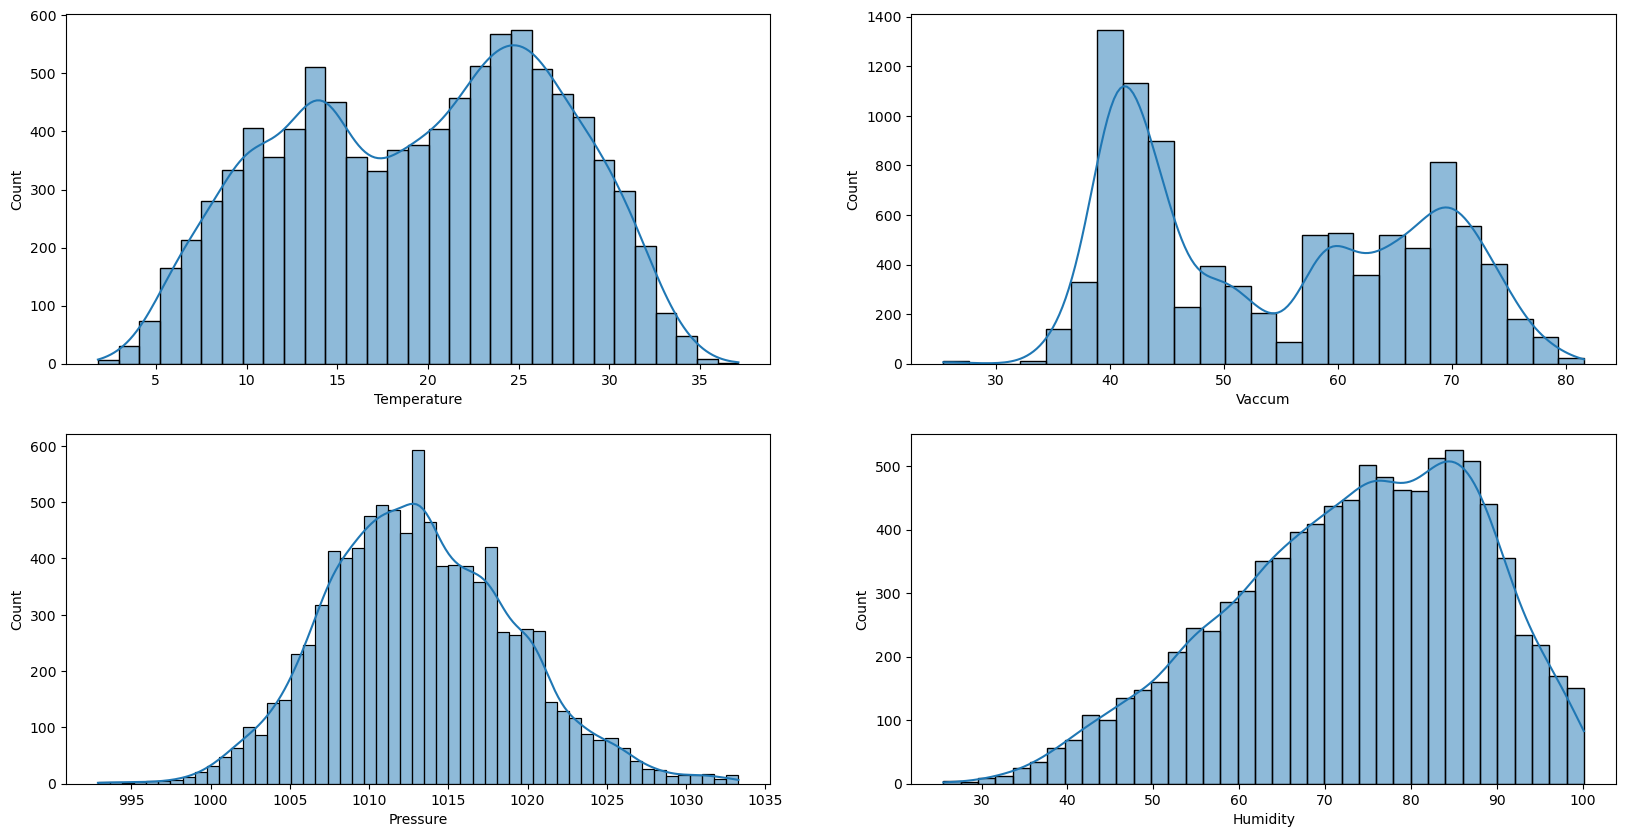

In [25]:
plt.rcParams['figure.figsize']=(20,10)

plt.subplot(2,2, 1)
sns.histplot(df['Temperature'], kde=True)

plt.subplot(2,2, 2)
sns.histplot(df['Vaccum'], kde=True)

plt.subplot(2,2, 3)
sns.histplot(df['Pressure'], kde=True)

plt.subplot(2,2, 4)
sns.histplot(df['Humidity'], kde=True)

plt.show()

In [27]:
df.skew()

Temperature   -0.136393
Vaccum         0.198521
Pressure       0.265445
Humidity      -0.431839
Energy         0.306509
dtype: float64

In [6]:
X= df.drop(columns=['Energy'])
y= df['Energy']

**Train Test Split:**

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
X_train

,Temperature,Vaccum,Pressure,Humidity
496,11.22,43.13,1017.24,80.90
294,13.67,54.30,1015.92,75.42
6796,32.84,77.95,1014.68,45.80
6785,31.91,67.83,1008.76,53.22
1203,10.37,37.50,1013.19,79.25
...,...,...,...,...
7891,16.21,50.90,1012.46,84.45
9225,13.85,44.90,1019.11,76.79
4859,16.81,38.52,1018.26,75.21
3264,12.80,41.16,1022.43,86.19


**Modelling:**

**1) Linear Regression:**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

ypred_train = lr.predict(X_train)
ypred_test  = lr.predict(X_test)

from sklearn.metrics import r2_score
print('Train R2:',r2_score(y_train,ypred_train))
print('Test R2 :',r2_score(y_test,ypred_test))

**2) Polynomial Regression:**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polreg = PolynomialFeatures(degree=5,include_bias=False)
Xtrain_poly = pd.DataFrame(polreg.fit_transform(X_train))
Xtest_poly  = pd.DataFrame(polreg.transform(X_test))

from sklearn.linear_model import LinearRegression
lr_pol = LinearRegression()
lr_pol.fit(Xtrain_poly,y_train)

ytrain_poly = lr_pol.predict(Xtrain_poly)
ytest_poly  = lr_pol.predict(Xtest_poly)

print('Train R2:',r2_score(y_train,ytrain_poly))
print('Test R2 :',r2_score(y_test,ytest_poly))

In [ ]:
Train_R2 = []
Test_R2  = []

for i in range(1,11):
    from sklearn.preprocessing import PolynomialFeatures
    polreg = PolynomialFeatures(degree=i,include_bias=False)
    Xtrain_poly = pd.DataFrame(polreg.fit_transform(X_train))
    Xtest_poly  = pd.DataFrame(polreg.transform(X_test))

    from sklearn.linear_model import LinearRegression
    lr_pol = LinearRegression()
    lr_pol.fit(Xtrain_poly,y_train)

    ytrain_poly = lr_pol.predict(Xtrain_poly)
    ytest_poly  = lr_pol.predict(Xtest_poly)
    
    Train_R2.append(r2_score(y_train,ytrain_poly))
    Test_R2.append(r2_score(y_test,ytest_poly))

print(np.array(Train_R2).argmax()+1,np.array(Test_R2).argmax()+1)

**3) Lasso Regression:**

In [ ]:
#--- Applying Hyper Parameter Tuning for Lasso Regression:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

estimator = Lasso()
param_grid = {'alpha':list(range(1,100))}
lrmodel_hp = GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
lrmodel_hp.fit(X_train,y_train)
lrmodel_hp.best_params_


In [ ]:
#--- Building Lasso Model with Best HyperParameters:
from sklearn.linear_model import Lasso
lasso_best = Lasso(alpha=1.0)
lasso_best.fit(X_train,y_train)
print('Intercept:',lasso_best.intercept_)
print('Coefficient:',lasso_best.coef_)

ypred_train = lasso_best.predict(X_train)
ypred_test  = lasso_best.predict(X_test)

from sklearn.metrics import r2_score
print('Train R2:',r2_score(y_train,ypred_train))
print('Test R2:', r2_score(y_test,ypred_test))

**4) Ridge Regression:**

In [ ]:
#--- Applying Hyper Parameter Tuning for Lasso Regression:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

estimator = Ridge()
param_grid = {'alpha':list(range(1,100))}
rdgmodel_hp = GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
rdgmodel_hp.fit(X_train,y_train)
rdgmodel_hp.best_params_


In [ ]:
#--- Building Ridge Model with Best HyperParameters:
from sklearn.linear_model import Ridge
ridge_best = Ridge(alpha=86)
ridge_best.fit(X_train,y_train)
print('Intercept:',ridge_best.intercept_)
print('Coefficient:',ridge_best.coef_)

In [ ]:
ypred_train = ridge_best.predict(X_train)
ypred_test  = ridge_best.predict(X_test)

from sklearn.metrics import r2_score
print('Train R2:',r2_score(y_train,ypred_train))
print('Test R2:', r2_score(y_test,ypred_test))

**5) ElasticNet Regression:**

In [ ]:
#---- Applying Hyper Parameter Tuning for ElasticNet Regression:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

estimator = ElasticNet()

param_grid = {'alpha':list(range(1,10)),'l1_ratio':[0.5,0.6,0.7,0.8,0.9,1]}

eln_model = GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
eln_model.fit(X_train,y_train)
eln_model.best_params_

In [ ]:
#--- Building the Elactic Net Model with Best Hyper Parameters:

from sklearn.linear_model import ElasticNet
el_model = ElasticNet(alpha=1, l1_ratio=1)
el_model.fit(X_train,y_train)
print('Intercept:',el_model.intercept_)
print('Coefficient:',el_model.coef_)

In [ ]:
ypred_train = el_model.predict(X_train)
ypred_test  = el_model.predict(X_test)

from sklearn.metrics import r2_score
print('Train R2:',r2_score(y_train,ypred_train))
print('Test R2:', r2_score(y_test,ypred_test))

# DL Algorithms:

**6) Perceptron Model:**

In [9]:
import tensorflow as tf
import keras

In [12]:
# design
from keras.models import Sequential
p_model = Sequential()
from keras.layers import Dense
p_model.add(Dense(input_dim=4,units=1,activation='relu',kernel_initializer='uniform'))
p_model.compile(optimizer='adam',loss='mean_squared_error')

C:\Users\Suraj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#----Fit on Train Data:

p_model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 132169.0625
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23849.2148
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2531.8896
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 522.0231
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 439.7836
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 420.9993
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 416.0847
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 407.0778
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 403.2597
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 377.8418
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 365.9701
Epoch 12/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 361.1893
Epoch 13/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 342.8071
Epoch 14/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 313.4948
Epoch 15/

In [15]:
#---- Predicting the Results:

ypred_train = p_model.predict(X_train)
ypred_test  = p_model.predict(X_test)

#---- Evaluation

from sklearn.metrics import r2_score
print('Train R2:',r2_score(y_train,ypred_train))
print('Test R2:',r2_score(y_test,ypred_test))

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train R2: 0.9103461415196706
Test R2: 0.9145489573739741


**7) Building the ANN:**

In [21]:
from keras import Sequential
from keras.layers import Dense

#--- Design ( Adding Layers + Compile)
#---- Initialising the ANN:

ann_model = Sequential()

#-- Adding the input Layer and the first Hidden Layer:

ann_model.add(Dense(input_dim=4,units=6,activation='relu',kernel_initializer='uniform'))

#---- Adding the Secong Hidden Layer:

ann_model.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))

#---- Adding the Output Layer:

ann_model.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))

#----- Compiling the ANN:

ann_model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
#--- Training the ANN model on the Training Set:

ann_model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 186583.4219
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1004.2767
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 446.9865
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 423.7022
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 401.5192
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 385.5641
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 353.9121
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 324.4102
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 292.1637
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 264.6913
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 238.3459
Epoch 12/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 209.6515
Epoch 13/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 187.0334
Epoch 14/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 157.9188
Epoch 15/10

In [23]:
#---- Predicting the Results:

ypred_train = ann_model.predict(X_train)
ypred_test  = ann_model.predict(X_test)

#---- Evaluation

from sklearn.metrics import r2_score
print('Train R2:',r2_score(y_train,ypred_train))
print('Test R2:',r2_score(y_test,ypred_test))

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train R2: 0.9105273375180178
Test R2: 0.9149822121270886
